In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
        
#load the sample data to test
se = scopeEmulator()
se.loadData('../data/HV130_high_300mV_def.hd5')

processing the 1000th events...
processing the 1050th events...
processing the 1100th events...
processing the 1150th events...
processing the 1200th events...
processing the 1250th events...
processing the 1300th events...
processing the 1350th events...
time consumed: 495.6285421848297
trigger time jitter = 5586.7144
preAmp time jitter = 485.15704
Walk corrected time jitter = 485.15704


(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 397.,   0.,   1.]),
 array([-37064.906 , -32616.582 , -28168.26  , -23719.936 , -19271.611 ,
        -14823.288 , -10374.965 ,  -5926.6406,  -1478.3171,   2970.0063,
          7418.33  ,  11866.653 ,  16314.978 ,  20763.3   ,  25211.625 ,
         29659.95  ,  34108.273 ,  38556.594 ,  43004.918 ,  47453.242 ,
         51901.566 ], dtype=float32),
 <a list of 20 Patch objects>)

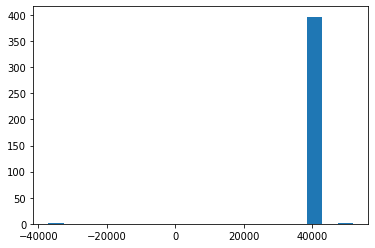

In [2]:
ts = se.runTimeWalk(r0=1000, r1= 1400, nstep = 50, method = 'linear')
dts = np.subtract(ts[1], ts[0])
print('trigger time jitter = '+str(ts[0].std()))
print('preAmp time jitter = '+str(ts[1].std()))
print('Walk corrected time jitter = '+str(ts[1].std()))
plt.hist(dts, 20)

1100
[9999, -1]


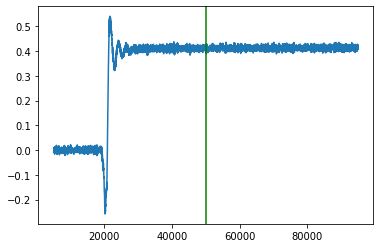

87352.96646686227
time consumed: 4.433508634567261


In [16]:
timing_start = time.time()
ievt = ts[0].argmax()+1000
#ievt = ts[0].argmin()+1000
#ievt= 1252
print(ievt)
nch = 1
evt1 = se.getEventAdjusted(ievt)
points = se._loadedData_
n0 = se.leftJumpScan(points[0], points[nch])
fcft = se.simulateCFT(points[0], points[nch])
inte = se.crossRegion(fcft,n0)
#plt.plot(evt1[0], evt1[2])
print(inte)
plt.plot(evt1[0][500:-500], fcft(evt1[0][500:-500]))
plt.plot(evt1[0][inte[0]-10:inte[1]+10], evt1[2][inte[0]-10:inte[1]+10])
plt.plot(evt1[0][inte[0]-10:inte[1]+10], fcft(evt1[0][inte[0]-10:inte[1]+10]), color='red')

ndens = 100
densdt = (evt1[0][inte[1]+10]-evt1[0][inte[0]-10])/ndens
densx = np.zeros(ndens)

for i in range(ndens):
    densx[i] = evt1[0][inte[0]-10]+i*densdt

#plt.plot(densx, fcft(densx))
res = se.getCFTiming(ievt,method = 'linear')
res2 = se.getCFTiming(ievt,method = 'newton')
#print(res)
plt.axvline((inte[1]+inte[0])/2*se.dt,color='Green')

#plt.axvline(res[nch-1],color='Red')
plt.show()
print(res[nch-1]-res2[nch-1])

timing_stop = time.time()
print('time consumed: '+str(timing_stop-timing_start))